In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("Foodora Data.xlsx")
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
# Handle missing values (Cuisines has a few missing)
df['Cuisines'].fillna('Unknown', inplace=True)

# Map Yes/No to 1/0 for analysis
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Focus on India (Country Code 1) for deeper insights (optional but recommended)
df_india = df[df['Country Code'] == 1].copy()

print(f"Total restaurants: {len(df)}")
print(f"India restaurants: {len(df_india)}")
print(f"Missing Cuisines handled: {df['Cuisines'].isnull().sum()}")

Total restaurants: 9551
India restaurants: 8652
Missing Cuisines handled: 0


C:\Users\alokg\AppData\Local\Temp\ipykernel_12892\2175511358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


In [6]:
# Summary
print(df.describe())

# Unique counts
print(f"Unique Cities: {df['City'].nunique()}")
print(f"Unique Localities: {df['Locality'].nunique()}")

# Top 10 cities
top_cities = df_india['City'].value_counts().head(10)
print("Top Cities (India):\n", top_cities)

# Delivery & Booking percentages (India)
print(f"Online Delivery (%): {df_india['Has Online delivery'].mean()*100:.2f}%")
print(f"Table Booking (%): {df_india['Has Table booking'].mean()*100:.2f}%")

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Has Table booking  Has Online delivery  \
count           9551.000000        9551.000000          9551.000000   
mean            1199.210763           0.121244             0.256622   
std            16121.183073           0.326428             0.436792   
min                0.000000           0.000000             0.000000   
25%              250.000000           0.000000             0.000000 

C:\Users\alokg\AppData\Local\Temp\ipykernel_12892\774695215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


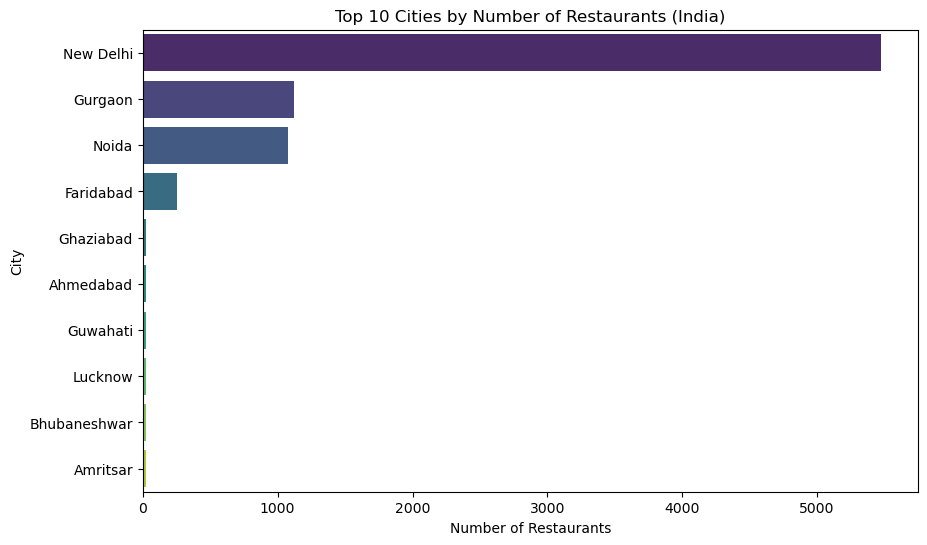

C:\Users\alokg\AppData\Local\Temp\ipykernel_12892\774695215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_ratings.values, y=city_ratings.index, palette='coolwarm')


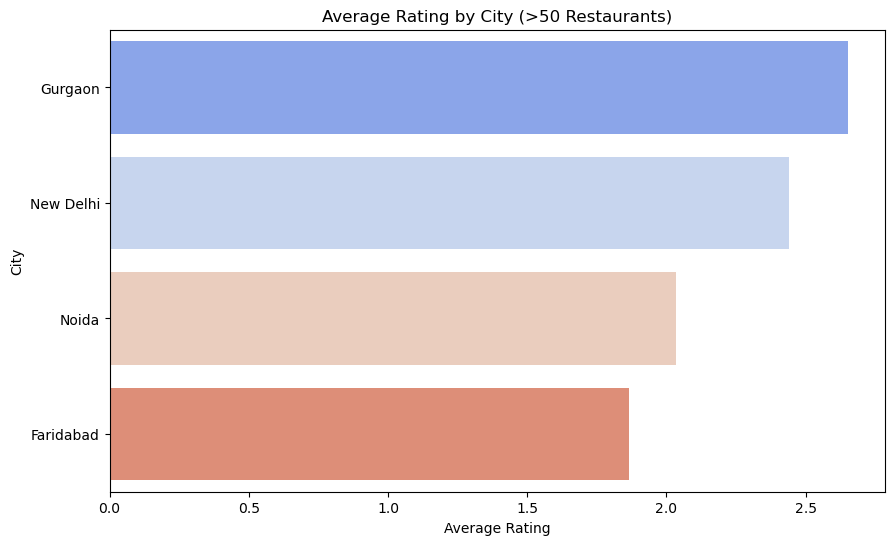

In [8]:
# Bar: Top 10 Cities by Restaurant Count
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities by Number of Restaurants (India)')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.savefig('top_cities.png', bbox_inches='tight')
plt.show()

# Average Rating by City (filter cities with >50 restaurants)
city_ratings = df_india.groupby('City')['Aggregate rating'].mean()
city_counts = df_india['City'].value_counts()
city_ratings = city_ratings[city_counts > 50].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=city_ratings.values, y=city_ratings.index, palette='coolwarm')
plt.title('Average Rating by City (>50 Restaurants)')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.savefig('city_ratings.png', bbox_inches='tight')
plt.show()

C:\Users\alokg\AppData\Local\Temp\ipykernel_12892\2501325334.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='magma')


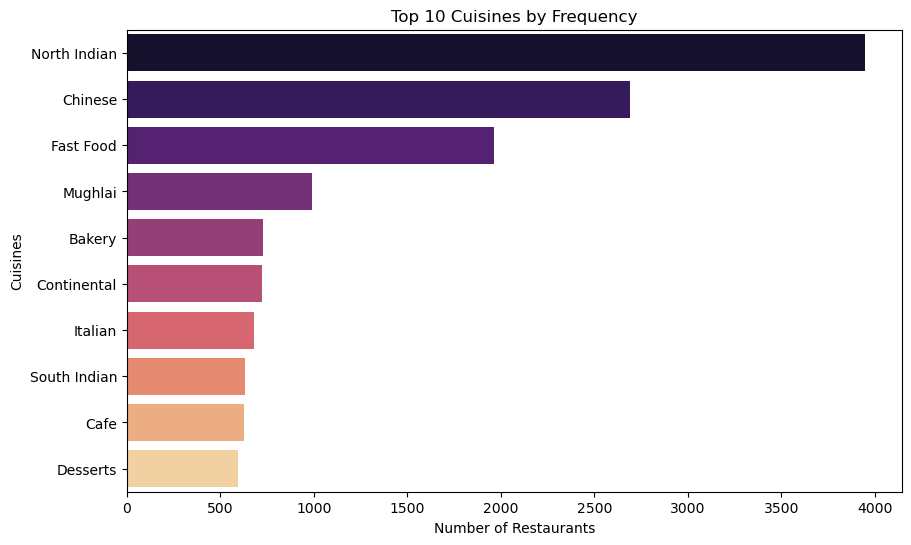

C:\Users\alokg\AppData\Local\Temp\ipykernel_12892\2501325334.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='YlGnBu')


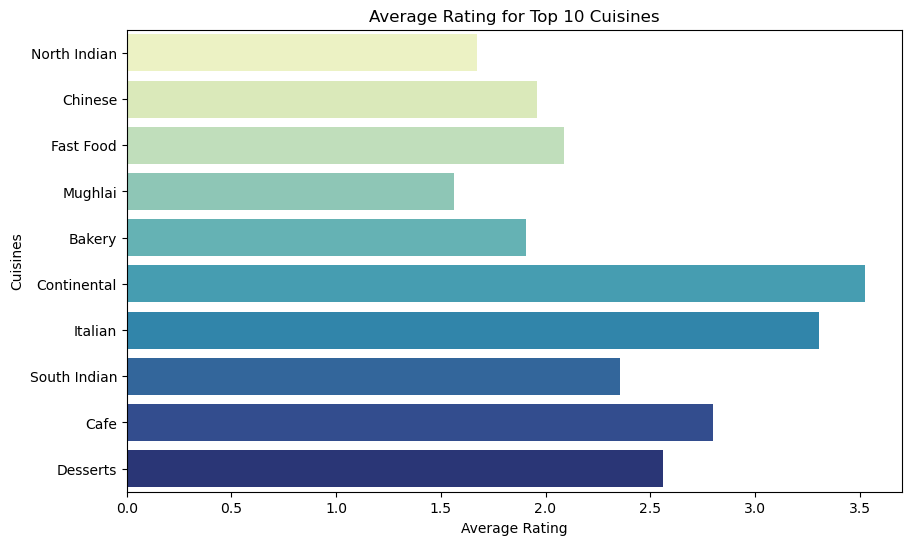

In [10]:
# Top 10 Cuisines (explode multi-cuisines)
cuisines_series = df_india['Cuisines'].str.split(', ').explode()
top_cuisines = cuisines_series.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='magma')
plt.title('Top 10 Cuisines by Frequency')
plt.xlabel('Number of Restaurants')
plt.savefig('top_cuisines.png', bbox_inches='tight')
plt.show()

# Average Rating by Top Cuisines
cuisine_ratings = df_india.explode('Cuisines').groupby('Cuisines')['Aggregate rating'].mean()[top_cuisines.index]

plt.figure(figsize=(10,6))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='YlGnBu')
plt.title('Average Rating for Top 10 Cuisines')
plt.xlabel('Average Rating')
plt.savefig('cuisine_ratings.png', bbox_inches='tight')
plt.show()

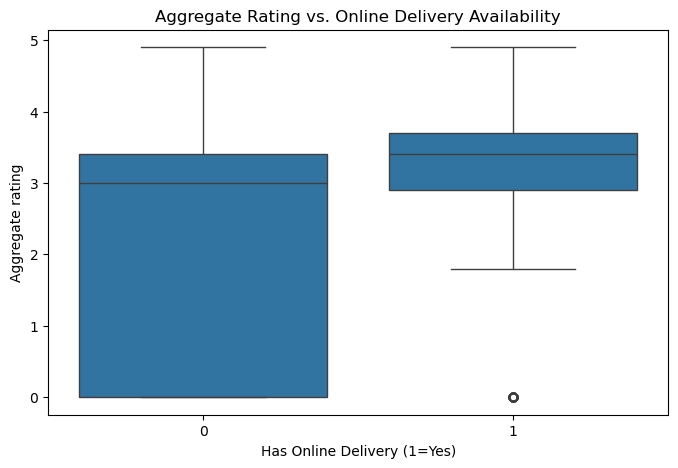

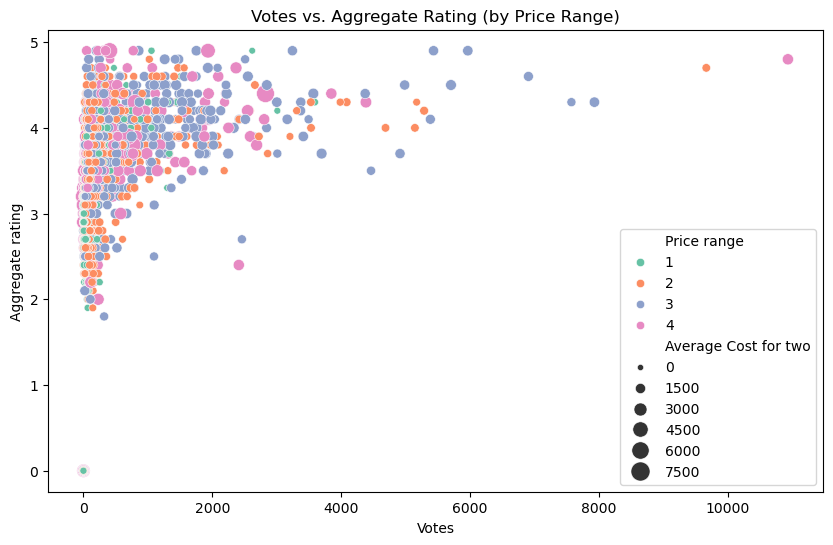

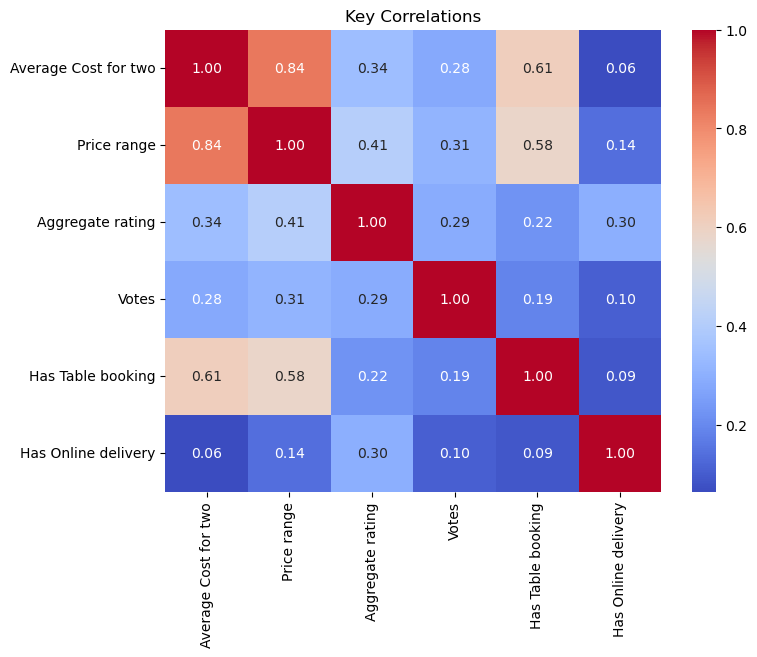

In [12]:
# Boxplot: Rating by Online Delivery
plt.figure(figsize=(8,5))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df_india)
plt.title('Aggregate Rating vs. Online Delivery Availability')
plt.xlabel('Has Online Delivery (1=Yes)')
plt.savefig('delivery_rating.png', bbox_inches='tight')
plt.show()

# Scatter: Votes vs Rating, colored by Price Range
plt.figure(figsize=(10,6))
sns.scatterplot(x='Votes', y='Aggregate rating', hue='Price range', size='Average Cost for two',
                data=df_india, palette='Set2', sizes=(20,200))
plt.title('Votes vs. Aggregate Rating (by Price Range)')
plt.savefig('votes_rating_price.png', bbox_inches='tight')
plt.show()

# Correlation Heatmap
numeric_cols = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
                'Has Table booking', 'Has Online delivery']
corr = df_india[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Key Correlations')
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()

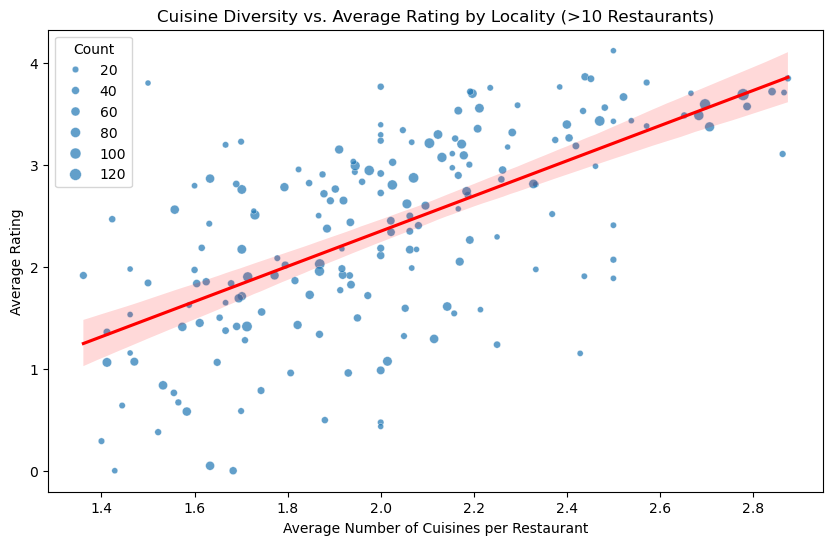

Correlation: 0.6269801861789429


In [14]:
# Add cuisine count per restaurant
df_india['Cuisine Diversity'] = df_india['Cuisines'].str.split(', ').apply(len)

# Group by Locality
locality_diversity = df_india.groupby('Locality')['Cuisine Diversity'].mean()
locality_rating = df_india.groupby('Locality')['Aggregate rating'].mean()
locality_count = df_india.groupby('Locality').size()

# Filter localities with >10 restaurants
diversity_df = pd.DataFrame({'Diversity': locality_diversity, 'Rating': locality_rating, 'Count': locality_count})
diversity_df = diversity_df[diversity_df['Count'] > 10]

plt.figure(figsize=(10,6))
sns.scatterplot(x='Diversity', y='Rating', size='Count', data=diversity_df, alpha=0.7)
sns.regplot(x='Diversity', y='Rating', data=diversity_df, scatter=False, color='red')
plt.title('Cuisine Diversity vs. Average Rating by Locality (>10 Restaurants)')
plt.xlabel('Average Number of Cuisines per Restaurant')
plt.ylabel('Average Rating')
plt.savefig('diversity_insight.png', bbox_inches='tight')
plt.show()

print("Correlation:", diversity_df['Diversity'].corr(diversity_df['Rating']))

In [16]:
import plotly.express as px
import plotly.graph_objects as go

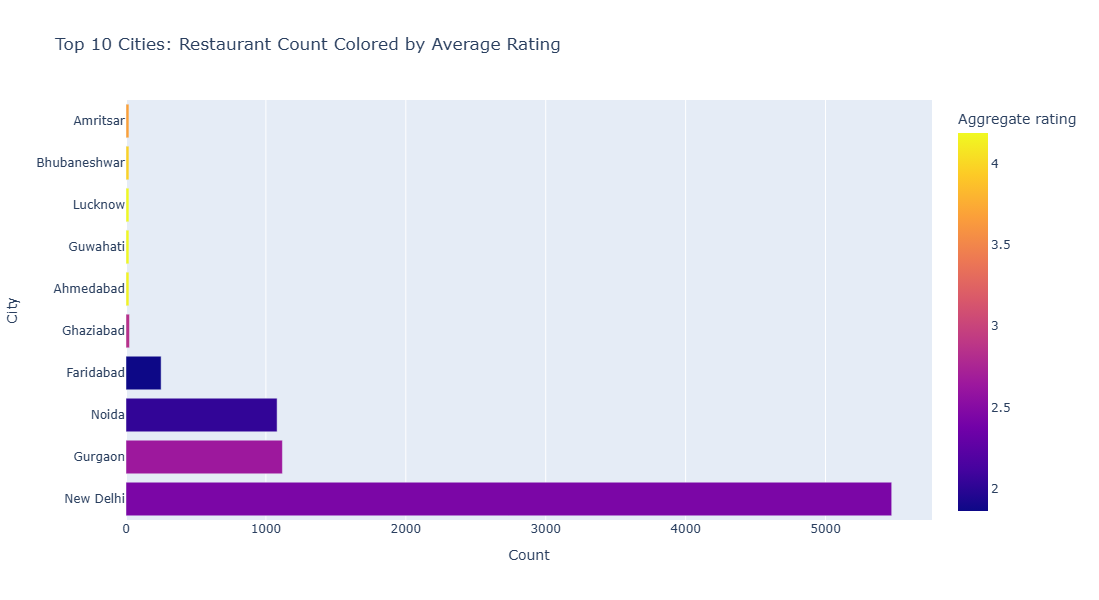

In [18]:
# Focus on India
df_india = df[df['Country Code'] == 1]

city_agg = df_india.groupby('City').agg({
    'Restaurant Name': 'count',
    'Aggregate rating': 'mean',
    'Average Cost for two': 'mean'
}).reset_index().rename(columns={'Restaurant Name': 'Count'})

fig = px.bar(city_agg.sort_values('Count', ascending=False).head(10),
             x='Count', y='City', color='Aggregate rating',
             hover_data=['Average Cost for two'],
             title='Top 10 Cities: Restaurant Count Colored by Average Rating')
fig.update_layout(height=600)
fig.show()

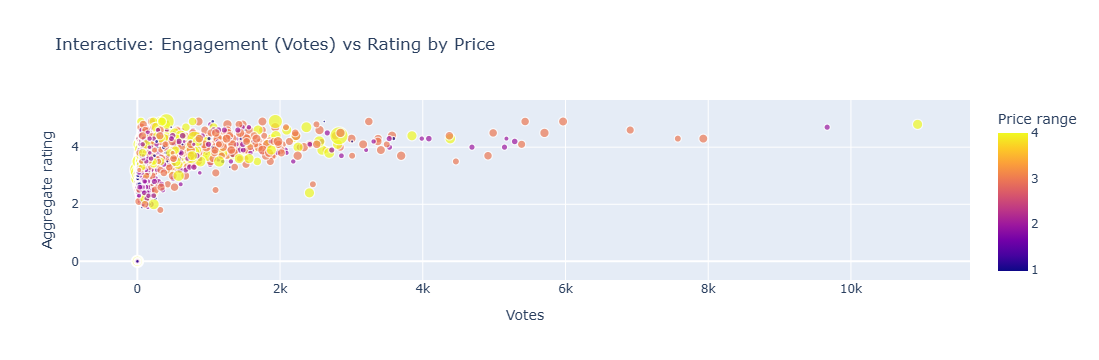

In [20]:
fig = px.scatter(df_india, x='Votes', y='Aggregate rating',
                 color='Price range', size='Average Cost for two',
                 hover_data=['Restaurant Name', 'Cuisines'],
                 title='Interactive: Engagement (Votes) vs Rating by Price')
fig.show()

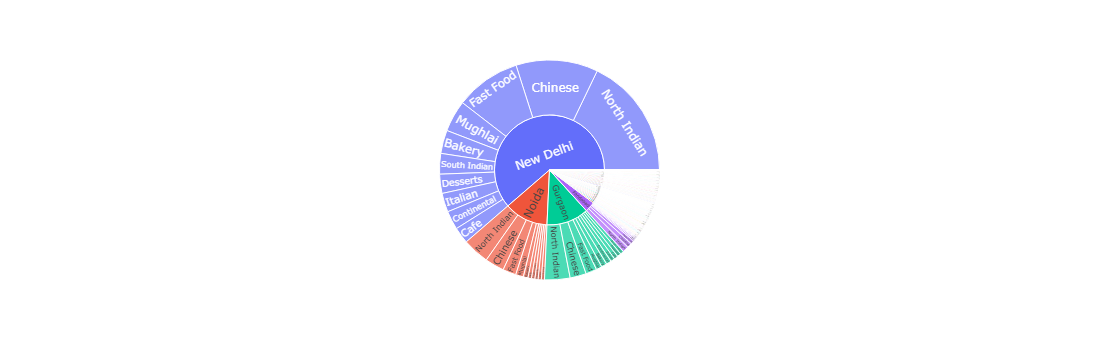

In [38]:
# Explode cuisines
exploded = df_india['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
exploded.name = 'Cuisine'
cuisine_df = df_india.drop('Cuisines', axis=1).join(exploded)

# Top cuisines with city
top_c = cuisine_df.groupby(['City', 'Cuisine']).size().reset_index(name='Count')
top_c = top_c[top_c['Cuisine'].isin(top_cuisines.index)]

fig = px.sunburst(top_c, path=['City', 'Cuisine'], values='Count')
                  # title='Cuisine Distribution Across Top Cities (Interactive Sunburst)')
fig.show()
# plt.savefig('city_wise_chart.png', dpi=300, bbox_inches='tight')

In [26]:
!pip install folium

In [30]:
import folium
from folium.plugins import HeatMap

# Focus on a major city, e.g., New Delhi (filter for performance)
delhi_df = df_india[df_india['City'] == 'New Delhi']

# Base map centered on average coords
m = folium.Map(location=[delhi_df['Latitude'].mean(), delhi_df['Longitude'].mean()], zoom_start=11)

# Heatmap for density
HeatMap(data=delhi_df[['Latitude', 'Longitude']], radius=10).add_to(m)

# Add markers for high-rated restaurants (e.g., >4.5)
for idx, row in delhi_df[delhi_df['Aggregate rating'] > 4.5].iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"{row['Restaurant Name']}<br>Rating: {row['Aggregate rating']}<br>Cuisines: {row['Cuisines']}",
        color='red',
        fill=True
    ).add_to(m)

m.save('delhi_restaurants_map.html')  # Save and open in browser, or display inline if possible
m  # Displays in notebook